<h2>Флаги</h2>


Датасет включате в себя информацию о различных нациях и их флагах. Цель исследования: используя методы машинного обучения предсказать религию конкретной страны, опираясь на ее размер и цвета, используемые в ее флаге.

<h4>Характеристики флагов:</h4>

1. name:	Name of the country concerned 
2. landmass:	1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania 
3. zone:	Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW 
4. area:	in thousands of square km 
5. population:	in round millions 
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others 
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others 
8. bars: Number of vertical bars in the flag 
9. stripes: Number of horizontal stripes in the flag 
10. colours: Number of different colours in the flag 
11. red: 0 if red absent, 1 if red present in the flag 
12. green: same for green 
13. blue: same for blue 
14. gold: same for gold (also yellow) 
15. white: same for white 
16. black: same for black 
17. orange: same for orange (also brown) 
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue) 
19. circles: Number of circles in the flag 
20. crosses: Number of (upright) crosses 
21. saltires: Number of diagonal crosses 
22. quarters: Number of quartered sections 
23. sunstars: Number of sun or star symbols 
24. crescent: 1 if a crescent moon symbol present, else 0 
25. triangle: 1 if any triangles present, 0 otherwise 
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0 
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise 
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise 
29. topleft: colour in the top-left corner (moving right to decide tie-breaks) 
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)

<h3>Загрузка данных:</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data', sep = ',', engine = 'python', header=None)

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
5,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
8,Argentina,2,3,2777,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,2,3,2777,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue


<h4>Добавим заголовки:</h4>

In [5]:
data.columns = [u'name', u'landmass', u'zone', u'area', u'population', 
u'language', u'religion', u'bars', u'stripes', u'colours', 
u'red', u'green', u'blue', u'gold', 
u'white', u'black', u'orange', u'mainhue', 
u'circles', u'crosses', u'saltires', u'quarters', u'sunstars', u'crescent', u'triangle', u'icon', u'animate', u'text', u'topleft', u'botright' ]

In [6]:
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [7]:
data.tail()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown
193,Zimbabwe,4,2,391,8,10,5,0,7,5,...,0,0,1,0,1,1,1,0,green,green


In [8]:
print(data)

                     name  landmass  zone   area  population  language  \
0             Afghanistan         5     1    648          16        10   
1                 Albania         3     1     29           3         6   
2                 Algeria         4     1   2388          20         8   
3          American-Samoa         6     3      0           0         1   
4                 Andorra         3     1      0           0         6   
5                  Angola         4     2   1247           7        10   
6                Anguilla         1     4      0           0         1   
7         Antigua-Barbuda         1     4      0           0         1   
8               Argentina         2     3   2777          28         2   
9               Argentine         2     3   2777          28         2   
10              Australia         6     2   7690          15         1   
11                Austria         3     1     84           8         4   
12                Bahamas         1   

In [9]:
data.index

RangeIndex(start=0, stop=194, step=1)

In [10]:
print(data.shape)
print(data.columns)

(194, 30)
Index(['name', 'landmass', 'zone', 'area', 'population', 'language',
       'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue',
       'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses',
       'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon',
       'animate', 'text', 'topleft', 'botright'],
      dtype='object')


In [11]:
data.at[20, 'name']

'Bhutan'

In [12]:
data['name']

0               Afghanistan
1                   Albania
2                   Algeria
3            American-Samoa
4                   Andorra
5                    Angola
6                  Anguilla
7           Antigua-Barbuda
8                 Argentina
9                 Argentine
10                Australia
11                  Austria
12                  Bahamas
13                  Bahrain
14               Bangladesh
15                 Barbados
16                  Belgium
17                   Belize
18                    Benin
19                  Bermuda
20                   Bhutan
21                  Bolivia
22                 Botswana
23                   Brazil
24     British-Virgin-Isles
25                   Brunei
26                 Bulgaria
27                  Burkina
28                    Burma
29                  Burundi
               ...         
164               Swaziland
165                  Sweden
166             Switzerland
167                   Syria
168                 

In [13]:
type(data['name'])

pandas.core.series.Series

In [14]:
type(data['name'][20])

str

In [15]:
data[['name', 'religion']].head()

,name,religion
0,Afghanistan,2
1,Albania,6
2,Algeria,2
3,American-Samoa,1
4,Andorra,0


In [16]:
data.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


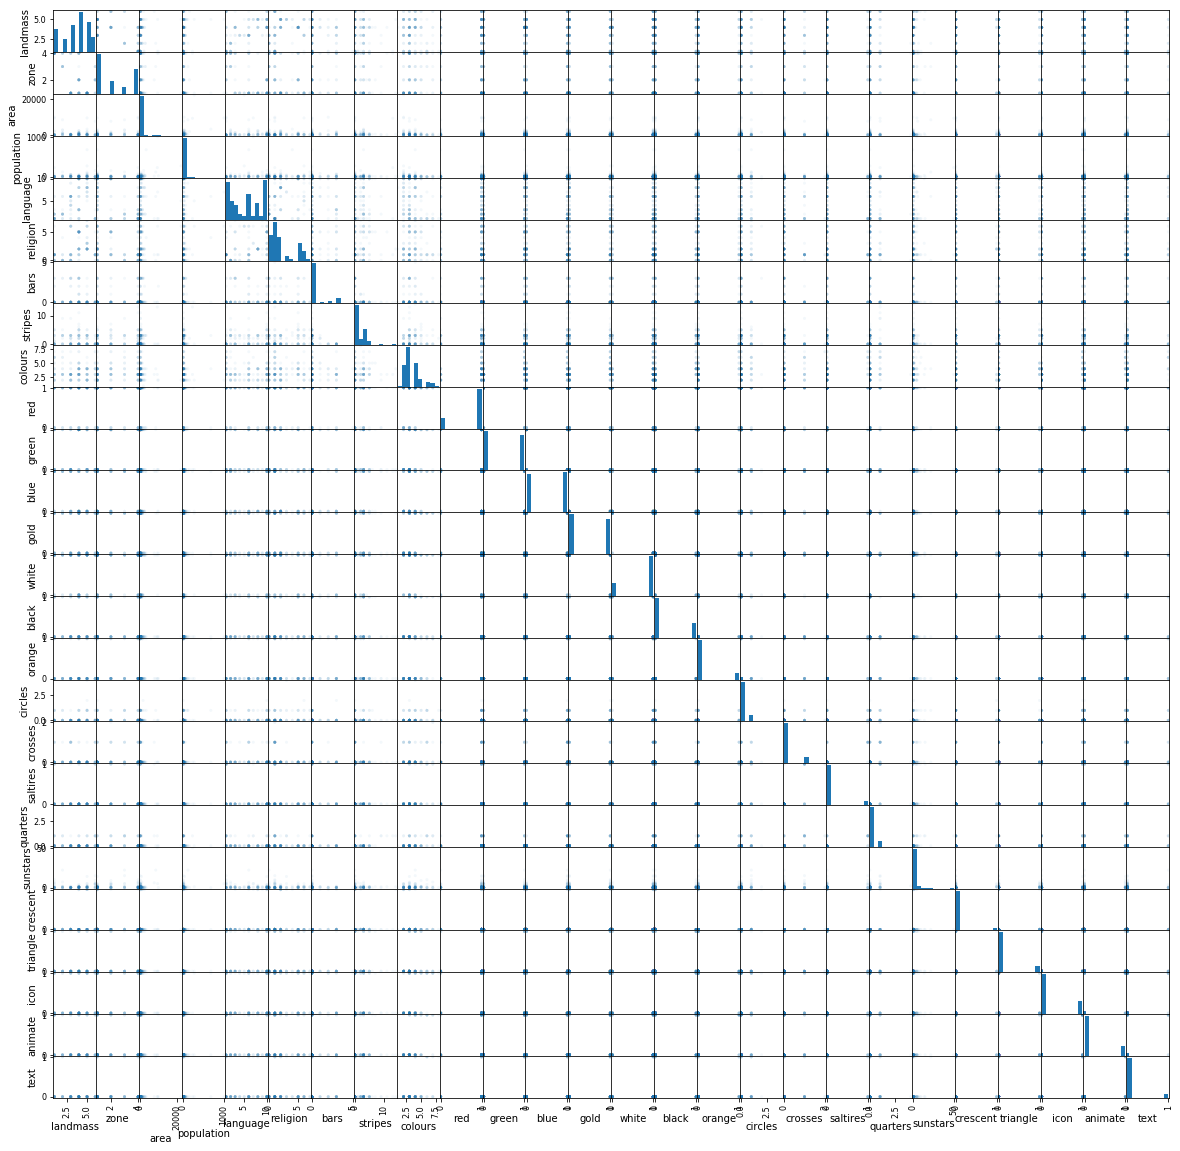

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .05, figsize = (20, 20))
pass

In [18]:
data.corr()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
landmass,1.000000,-0.615759,0.013279,0.105940,0.496400,0.325073,-0.139290,-0.063375,-0.062856,0.093400,...,0.065696,-0.031103,-0.003429,-0.004537,-0.034843,0.168438,-0.033154,0.030359,-0.118856,-0.110743
zone,-0.615759,1.000000,-0.025431,-0.124111,-0.618387,-0.320537,0.085446,0.002359,0.173567,-0.032269,...,-0.042542,0.101441,0.179667,0.153300,0.121754,-0.159272,0.060416,-0.048692,0.106034,0.037602
area,0.013279,-0.025431,1.000000,0.519030,-0.027869,0.087941,0.001243,0.028454,-0.162227,-0.005470,...,-0.005652,-0.057888,-0.025492,-0.001968,0.340572,-0.005049,-0.075366,0.026593,-0.051539,0.024423
population,0.105940,-0.124111,0.519030,1.000000,0.062804,0.172731,-0.041392,0.030100,-0.115052,-0.024648,...,0.051257,-0.076305,-0.059061,-0.041349,0.191377,-0.015544,-0.078156,0.017966,-0.082259,-0.025194
language,0.496400,-0.618387,-0.027869,0.062804,1.000000,0.422315,-0.049862,0.105409,-0.197883,-0.011048,...,0.098476,-0.210966,-0.296106,-0.220535,-0.126241,0.193375,-0.064845,0.028336,-0.133756,-0.082977
religion,0.325073,-0.320537,0.087941,0.172731,0.422315,1.000000,-0.060000,0.103222,-0.017720,0.121721,...,0.123260,-0.225238,-0.133373,-0.135713,-0.075081,0.053145,0.056868,0.055714,-0.002741,-0.055158
bars,-0.139290,0.085446,0.001243,-0.041392,-0.049862,-0.060000,1.000000,-0.273371,-0.064574,-0.017093,...,-0.096650,-0.144432,-0.140070,-0.150604,-0.114667,0.021743,-0.132973,-0.002598,0.016260,0.067709
stripes,-0.063375,0.002359,0.028454,0.030100,0.105409,0.103222,-0.273371,1.000000,0.038278,0.014210,...,-0.087479,-0.190550,-0.190735,0.091941,0.215486,-0.010242,-0.005719,-0.107426,-0.157922,-0.111564
colours,-0.062856,0.173567,-0.162227,-0.115052,-0.197883,-0.017720,-0.064574,0.038278,1.000000,0.311759,...,0.178062,0.253827,0.378810,0.187861,0.031008,-0.173644,0.143252,0.505614,0.544576,0.398483
red,0.093400,-0.032269,-0.005470,-0.024648,-0.011048,0.121721,-0.017093,0.014210,0.311759,1.000000,...,0.108639,0.102772,0.122031,0.119914,0.019726,-0.091458,0.025760,0.097513,0.133648,0.017507


<h4>Как видим, данные в основном слабо коррелируют.</h4>

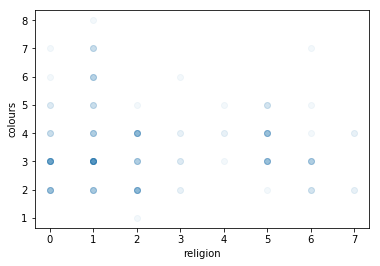

In [19]:
plt.plot(data['religion'], data['colours'], 'o', alpha = 0.05)
plt.xlabel('religion')
plt.ylabel('colours')
pass

In [20]:
data['religion'] == 6

0      False
1       True
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26      True
27     False
28     False
29     False
       ...  
164    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173    False
174    False
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184     True
185    False
186    False
187    False
188     True
189    False
190     True
191    False
192    False
193    False
Name: religion, Length: 194, dtype: bool

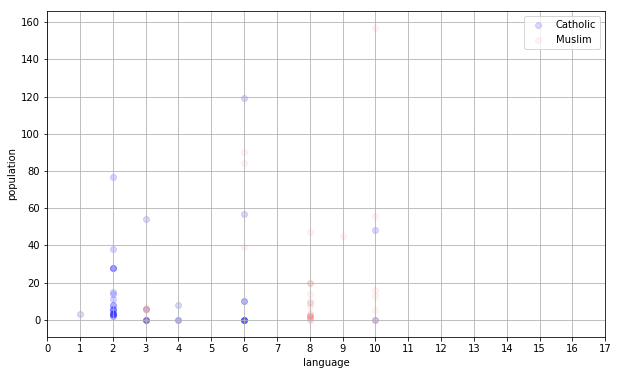

In [21]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['religion'] == 0]['language'],
            data[data['religion'] == 0]['population'],
            alpha = 0.15,
            label = 'Catholic',
            color = 'b')

plt.scatter(data[data['religion'] == 2]['language'],
            data[data['religion'] == 2]['population'],
            alpha = 0.05,
            label = 'Muslim',
            color = 'r')

plt.xlabel('language')
plt.xticks(range(18))
plt.xlim(0, 17)
plt.ylabel('population')
plt.legend()
plt.grid()

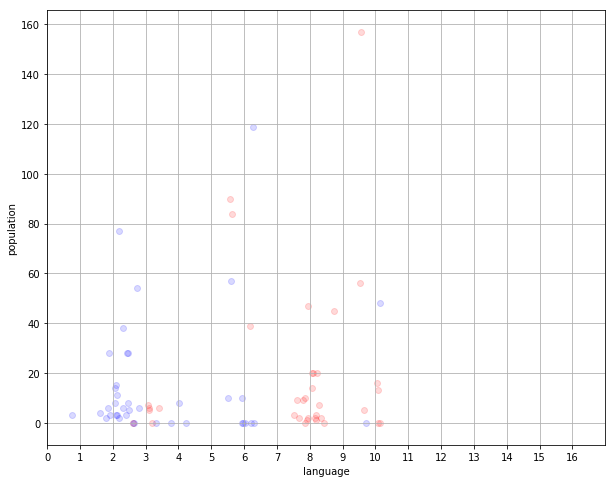

In [22]:
np.random.seed(0)
education_num_rnd = data['language'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data['religion'] == 0],
            data[data['religion'] == 0]['population'],
            alpha = 0.15,
            label = 'Catholic',
            color = 'b')

plt.scatter(education_num_rnd[data['religion'] == 2],
            data[data['religion'] == 2]['population'],
            alpha = 0.15,
            label = 'Muslim',
            color = 'r')

plt.xlabel('language')
plt.xticks(range(17))
plt.xlim(0, 17)
plt.ylabel('population')
plt.grid()

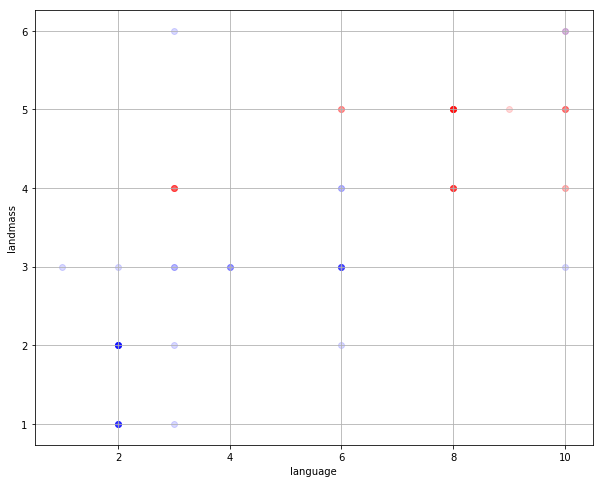

In [23]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['religion'] == 2]['language'],
            data[data['religion'] == 2]['landmass'],
            alpha = 0.15,
            label = 'Muslim',
            color = 'r')

plt.scatter(data[data['religion'] == 0]['language'],
            data[data['religion'] == 0]['landmass'],
            alpha = 0.15,
            label = 'Catholic',
            color = 'b')

plt.xlabel('language')
plt.ylabel('landmass')
plt.grid()

In [24]:
data.describe(include = ['object'])

,name,mainhue,topleft,botright
count,194,194,194,194
unique,194,8,7,8
top,Congo,red,red,red
freq,1,71,56,69


In [25]:
data.describe(include = 'all')

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
count,194,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194,194
unique,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,8
top,Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red,red
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,69
mean,NaN,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,...,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474,NaN,NaN
std,NaN,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,...,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798,NaN,NaN
min,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000,NaN,NaN


<h4>Видимо из-за числового характера данных, методы unique, top и freq не выполнились корректно в большинстве числовых столбцев</h4>

In [26]:
data['name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American-Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua-Barbuda', 'Argentina', 'Argentine',
       'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Botswana', 'Brazil', 'British-Virgin-Isles', 'Brunei',
       'Bulgaria', 'Burkina', 'Burma', 'Burundi', 'Cameroon', 'Canada',
       'Cape-Verde-Islands', 'Cayman-Islands', 'Central-African-Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comorro-Islands', 'Congo',
       'Cook-Islands', 'Costa-Rica', 'Cuba', 'Cyprus', 'Czechoslovakia',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican-Republic', 'Ecuador',
       'Egypt', 'El-Salvador', 'Equatorial-Guinea', 'Ethiopia', 'Faeroes',
       'Falklands-Malvinas', 'Fiji', 'Finland', 'France', 'French-Guiana',
       'French-Polynesia', 'Gabon', 'Gambia', 'Germany-DDR', 'Germany-FRG',
       'Ghana', 'Gibraltar', 'Greece', 'Greenlan

<h2>Подготовка данных</h2>

In [27]:
data['name'].dtype.name

'object'

In [28]:

data['religion'].dtype.name

'int64'

In [29]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['name', 'mainhue', 'topleft', 'botright']
['landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text']


In [30]:
for c in categorical_columns:
    print(c, data[c].unique())

name ['Afghanistan' 'Albania' 'Algeria' 'American-Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua-Barbuda' 'Argentina' 'Argentine' 'Australia' 'Austria'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia' 'Botswana' 'Brazil' 'British-Virgin-Isles'
 'Brunei' 'Bulgaria' 'Burkina' 'Burma' 'Burundi' 'Cameroon' 'Canada'
 'Cape-Verde-Islands' 'Cayman-Islands' 'Central-African-Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comorro-Islands' 'Congo' 'Cook-Islands'
 'Costa-Rica' 'Cuba' 'Cyprus' 'Czechoslovakia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican-Republic' 'Ecuador' 'Egypt' 'El-Salvador'
 'Equatorial-Guinea' 'Ethiopia' 'Faeroes' 'Falklands-Malvinas' 'Fiji'
 'Finland' 'France' 'French-Guiana' 'French-Polynesia' 'Gabon' 'Gambia'
 'Germany-DDR' 'Germany-FRG' 'Ghana' 'Gibraltar' 'Greece' 'Greenland'
 'Grenada' 'Guam' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hong-Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Ir

<h4>Признак 'name' можно удалить</h4>

In [31]:
data = data.drop('name', axis = 1)

In [32]:
data.head()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,5,1,648,16,10,2,0,3,5,1,...,0,0,1,0,0,1,0,0,black,green
1,3,1,29,3,6,6,0,0,3,1,...,0,0,1,0,0,0,1,0,red,red
2,4,1,2388,20,8,2,2,0,3,1,...,0,0,1,1,0,0,0,0,green,white
3,6,3,0,0,1,1,0,0,5,1,...,0,0,0,0,1,1,1,0,blue,red
4,3,1,0,0,6,0,3,0,3,1,...,0,0,0,0,0,0,0,0,blue,red


In [33]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']

<h2>Обрабатываем пропущенные значения</h2>

Пропущенные данные заполняем либо медианой, либо самым частым значением (для типа object).

In [34]:
data.median(axis = 0)

landmass        4.0
zone            2.0
area          111.0
population      4.0
language        6.0
religion        1.0
bars            0.0
stripes         0.0
colours         3.0
red             1.0
green           0.0
blue            1.0
gold            0.0
white           1.0
black           0.0
orange          0.0
circles         0.0
crosses         0.0
saltires        0.0
quarters        0.0
sunstars        0.0
crescent        0.0
triangle        0.0
icon            0.0
animate         0.0
text            0.0
dtype: float64

In [35]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [36]:
data[numerical_columns].count(axis = 0)

landmass      194
zone          194
area          194
population    194
language      194
religion      194
bars          194
stripes       194
colours       194
red           194
green         194
blue          194
gold          194
white         194
black         194
orange        194
circles       194
crosses       194
saltires      194
quarters      194
sunstars      194
crescent      194
triangle      194
icon          194
animate       194
text          194
dtype: int64

In [37]:
data[categorical_columns].count(axis = 0)

mainhue     194
topleft     194
botright    194
dtype: int64

In [38]:
data['mainhue'].describe()

count     194
unique      8
top       red
freq       71
Name: mainhue, dtype: object

In [39]:
type(data['mainhue'].describe())

pandas.core.series.Series

In [40]:
data['mainhue'].describe().top

'red'

In [41]:
data['mainhue'] = data['mainhue'].fillna('red')

In [42]:
data.describe(include = [object])

,mainhue,topleft,botright
count,194,194,194
unique,8,7,8
top,red,red,red
freq,71,56,69


In [43]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [44]:
data.describe(include = [object])

,mainhue,topleft,botright
count,194,194,194
unique,8,7,8
top,red,red,red
freq,71,56,69


<h2>Векторизация</h2>

In [45]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['mainhue', 'topleft', 'botright']


Столбцы с бинарными данными отсутствуют. К небинарным данным применим векторизацию, используя метод get_dummies из pandas

In [46]:
data['mainhue'].unique()

array(['green', 'red', 'blue', 'gold', 'white', 'orange', 'black', 'brown'], dtype=object)

In [47]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['mainhue_black', 'mainhue_blue', 'mainhue_brown', 'mainhue_gold',
       'mainhue_green', 'mainhue_orange', 'mainhue_red', 'mainhue_white',
       'topleft_black', 'topleft_blue', 'topleft_gold', 'topleft_green',
       'topleft_orange', 'topleft_red', 'topleft_white', 'botright_black',
       'botright_blue', 'botright_brown', 'botright_gold', 'botright_green',
       'botright_orange', 'botright_red', 'botright_white'],
      dtype='object')


Например, если признак mainhue принимает значение black, то признак mainhue_black равен 1, а все остальные равны 0. По аналогии для остальных признаков.

<h2>Нормализация количественных признаков</h2>

In [48]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [50]:
data_numerical.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,...,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02
mean,-7.840235e-17,-1.762622e-16,2.947242e-17,-2.789865e-17,1.007213e-16,-7.096271e-17,-5.408045e-17,-8.698655e-17,-6.523991e-17,8.011919e-18,...,1.121669e-16,-9.728758e-18,2.346348e-17,-7.153499e-17,-2.332041e-17,1.742592e-16,-6.638447e-17,5.951711e-17,-6.638447e-17,4.807151e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.656237e+00,-9.259072e-01,-3.224641e-01,-2.530948e-01,-1.241294e+00,-1.062855e+00,-4.368596e-01,-6.664703e-01,-1.895096e+00,-1.926778e+00,...,-3.673339e-01,-3.878817e-01,-3.189758e-01,-3.429647e-01,-3.154093e-01,-2.445393e-01,-4.010527e-01,-5.798182e-01,-5.003158e-01,-2.990390e-01
25%,-3.684214e-01,-9.259072e-01,-3.183184e-01,-2.530948e-01,-9.552954e-01,-5.776929e-01,-4.368596e-01,-6.664703e-01,-3.568173e-01,5.163260e-01,...,-3.673339e-01,-3.878817e-01,-3.189758e-01,-3.429647e-01,-3.154093e-01,-2.445393e-01,-4.010527e-01,-5.798182e-01,-5.003158e-01,-2.990390e-01
50%,2.754863e-01,-1.615413e-01,-2.713339e-01,-2.095854e-01,1.887003e-01,-5.776929e-01,-4.368596e-01,-6.664703e-01,-3.568173e-01,5.163260e-01,...,-3.673339e-01,-3.878817e-01,-3.189758e-01,-3.429647e-01,-3.154093e-01,-2.445393e-01,-4.010527e-01,-5.798182e-01,-5.003158e-01,-2.990390e-01
75%,9.193940e-01,1.367191e+00,-1.053911e-01,-1.008118e-01,1.046697e+00,8.777930e-01,-4.368596e-01,6.221865e-01,4.123222e-01,5.163260e-01,...,-3.673339e-01,-3.878817e-01,-3.189758e-01,-3.429647e-01,-8.793939e-02,-2.445393e-01,-4.010527e-01,1.141887e+00,-5.003158e-01,-2.990390e-01
max,1.563302e+00,1.367191e+00,9.996626e+00,1.071128e+01,1.332696e+00,2.333279e+00,4.378524e+00,5.347262e+00,3.488880e+00,5.163260e-01,...,8.270578e+00,4.801708e+00,3.118874e+00,8.834297e+00,1.105809e+01,4.068244e+00,2.480585e+00,1.715788e+00,1.988435e+00,3.326808e+00


<h2>Соединяем все в одну таблицу</h2>

In [51]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(194, 49)


In [52]:
data.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
count,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,-7.840235e-17,-1.762622e-16,2.947242e-17,-2.789865e-17,1.007213e-16,-7.096271e-17,-5.408045e-17,-8.698655e-17,-6.523991e-17,8.011919e-18,...,0.288660,0.211340,0.046392,0.242268,0.010309,0.046392,0.206186,0.005155,0.355670,0.087629
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.454312,0.409315,0.210876,0.429564,0.101271,0.210876,0.405612,0.071796,0.479954,0.283486
min,-1.656237e+00,-9.259072e-01,-3.224641e-01,-2.530948e-01,-1.241294e+00,-1.062855e+00,-4.368596e-01,-6.664703e-01,-1.895096e+00,-1.926778e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.684214e-01,-9.259072e-01,-3.183184e-01,-2.530948e-01,-9.552954e-01,-5.776929e-01,-4.368596e-01,-6.664703e-01,-3.568173e-01,5.163260e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.754863e-01,-1.615413e-01,-2.713339e-01,-2.095854e-01,1.887003e-01,-5.776929e-01,-4.368596e-01,-6.664703e-01,-3.568173e-01,5.163260e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.193940e-01,1.367191e+00,-1.053911e-01,-1.008118e-01,1.046697e+00,8.777930e-01,-4.368596e-01,6.221865e-01,4.123222e-01,5.163260e-01,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.563302e+00,1.367191e+00,9.996626e+00,1.071128e+01,1.332696e+00,2.333279e+00,4.378524e+00,5.347262e+00,3.488880e+00,5.163260e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2>X и y</h2>

In [53]:
X = data.drop(('religion'), axis = 1) # выбрасываем столбец 'religion'
y = data['religion']
feature_names = X.columns

In [54]:
type(feature_names)

pandas.core.indexes.base.Index

In [55]:
feature_names

Index(['landmass', 'zone', 'area', 'population', 'language', 'bars', 'stripes',
       'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange',
       'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent',
       'triangle', 'icon', 'animate', 'text', 'mainhue_black', 'mainhue_blue',
       'mainhue_brown', 'mainhue_gold', 'mainhue_green', 'mainhue_orange',
       'mainhue_red', 'mainhue_white', 'topleft_black', 'topleft_blue',
       'topleft_gold', 'topleft_green', 'topleft_orange', 'topleft_red',
       'topleft_white', 'botright_black', 'botright_blue', 'botright_brown',
       'botright_gold', 'botright_green', 'botright_orange', 'botright_red',
       'botright_white'],
      dtype='object')

In [56]:
print(X.shape)
print(y.shape)
N, d = X.shape

(194, 48)
(194,)


In [57]:
type(y)

pandas.core.series.Series

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

135 59


<h2>$k$NN</h2>

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
err_train = []
err_test = []
neighbors = range(1, 30)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.astype('int'))
    err_train.append(np.mean(knn.predict(X_train) != y_train.astype('int')))
    err_test.append(np.mean(knn.predict(X_test) != y_test.astype('int')))

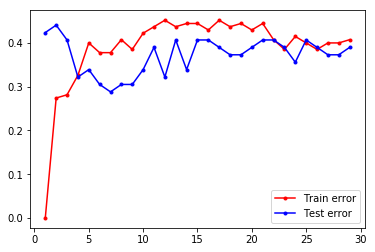

In [77]:
plt.plot(neighbors, err_train, '.-r', label = 'Train error')
plt.plot(neighbors, err_test,  '.-b', label = 'Test error')    
plt.legend()
plt.show()

In [78]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train.astype('int'))
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train.astype('int') != y_train_predict)
err_test  = np.mean(y_test.astype('int')  != y_test_predict)

print(err_train, err_test)

0.377777777778 0.28813559322


<h3>Как видим, kNN на этом наборе данных имеет тестовую ошибку 28.8% при k=7</h3>

In [81]:
err_test = 1 - knn.score(X_test, y_test.astype('int')) # Другой способ

In [82]:
err_test

0.28813559322033899

In [83]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test.astype('int'), y_test_predict))

[[ 7  3  1  0]
 [ 4 32  2  0]
 [ 1  5  3  0]
 [ 0  0  1  0]]


<h3>Подбор параметров</h3>

In [84]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train.astype('int'))

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.444444444444 20


In [85]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train.astype('int'))

err_train = np.mean(y_train.astype('int') != knn.predict(X_train))
err_test  = np.mean(y_test.astype('int')  != knn.predict(X_test))

print(err_train, err_test)

0.42962962963 0.389830508475


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


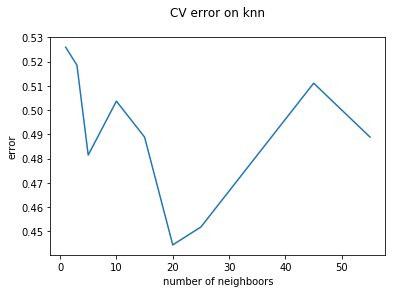

In [102]:
plt.plot(nnb, [1-x[1] for x in grid.grid_scores_])
plt.title('CV error on knn\n')
plt.xlabel('number of neighboors')
plt.ylabel('error')

<h3>Как видим, ошибка CV ошибка равна 44% при K=20. Ошибка на тестовой выборке при этом равна почти 39%</h3>

<h2>SVM</h2>

Классификатор, основанный на машине опорных векторов.

In [86]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train.astype('int'))

err_train = np.mean(y_train.astype('int') != svc.predict(X_train))
err_test  = np.mean(y_test.astype('int')  != svc.predict(X_test))

print(err_train, err_test)

0.311111111111 0.35593220339


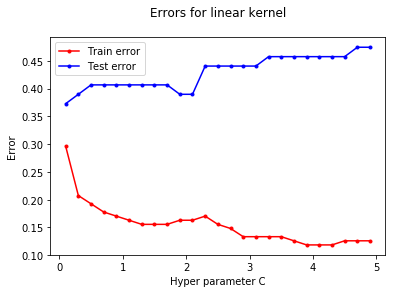

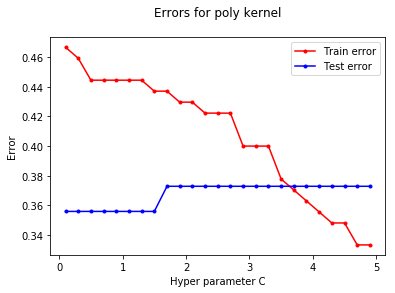

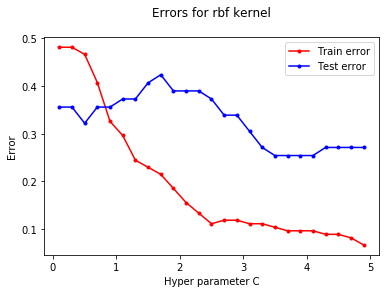

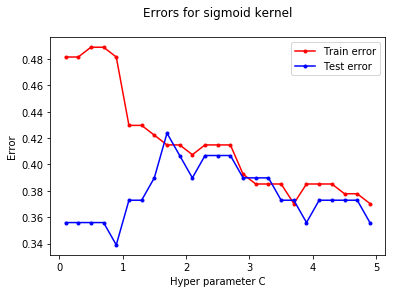

In [95]:
train_error = [[],[],[],[]]
test_error = [[],[],[],[]]
hyperC = np.arange(0.1,5,0.2)
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
for c in hyperC:
    for k in kernel:
        svc = SVC(kernel = k, C = c)
        svc.fit(X_train, y_train.astype('int'))
        err_train = np.mean(y_train.astype('int') != svc.predict(X_train))
        err_test = np.mean(y_test.astype('int') != svc.predict(X_test))
        train_error[kernel.index(k)].append(err_train)
        test_error[kernel.index(k)].append(err_test)
            
for i in range(len(train_error)):
    plt.plot(hyperC, train_error[i], '.-r', label = 'Train error')
    plt.plot(hyperC, test_error[i], '.-b', label = 'Test error')
    plt.legend()
    plt.title('Errors for '+kernel[i]+ ' kernel\n')
    plt.xlabel('Hyper parameter C')
    plt.ylabel('Error')
    plt.show()

In [96]:
gridSVC = GridSearchCV(svc, param_grid = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C': np.arange(0.1,5,0.2)}, cv=10)
gridSVC.fit(X, y.astype('int'))

best_cv_err = 1 - gridSVC.best_score_
best_kernel = gridSVC.best_estimator_.kernel
best_c = gridSVC.best_estimator_.C
print(best_cv_err, best_kernel, best_c)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.360824742268 linear 0.3


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


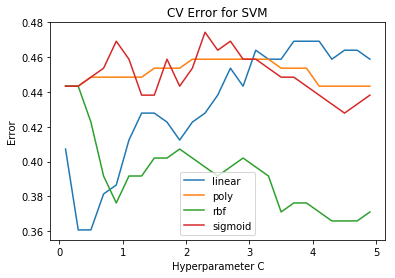

In [101]:
lines = [[],[],[],[]]
for x in gridSVC.grid_scores_:
    lines[kernel.index(x[0]['kernel'])].append((x[0]['C'],x[1]))

for i in range(len(lines)):
    plt.plot([x[0] for x in lines[i]],[1 - x[1] for x in lines[i]], label = kernel[i])
plt.legend()    
plt.title('CV Error for SVM')
plt.xlabel('Hyperparameter C')
plt.ylabel('Error')

<h3>Как видим, ядро linear показывает хорошие результаты при C=0.3; Также ядро rbf неплохо где-то при C>4</h3>

<h1>Logistic</h1>

In [105]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train.astype('int'))

err_train = np.mean(y_train.astype('int') != lr.predict(X_train))
err_test  = np.mean(y_test.astype('int')  != lr.predict(X_test))

print(err_train, err_test)

0.222222222222 0.406779661017


Ошибка на тестовой выборке 40%. Рассмотрим для разных гиперпараметров C и разных солверов:

In [107]:
train_error = [[],[],[],[],[]]
test_error = [[],[],[],[],[]]
hyperC = np.arange(0.2, 5, 0.2)
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for c in hyperC:
    for sol in solvers:
        lr = LogisticRegression(penalty = 'l2', C = c, solver = sol)
        lr.fit(X_train, y_train.astype('int'))
        err_train = np.mean(y_train.astype('int') != lr.predict(X_train))
        err_test = np.mean(y_test.astype('int') != lr.predict(X_test))
        if sol == 'newton-cg':
            train_error[0].append(err_train)
            test_error[0].append(err_test)
        if sol == 'lbfgs':
            train_error[1].append(err_train)
            test_error[1].append(err_test)
        if sol == 'liblinear':
            train_error[2].append(err_train)
            test_error[2].append(err_test)
        if sol == 'sag':
            train_error[3].append(err_train)
            test_error[3].append(err_test)
        if sol == 'saga':
            train_error[4].append(err_train)
            test_error[4].append(err_test)
            


C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


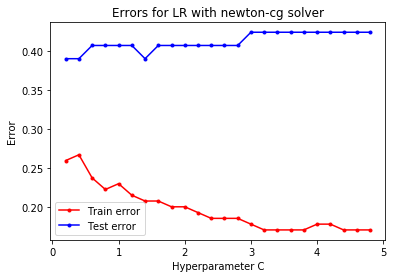

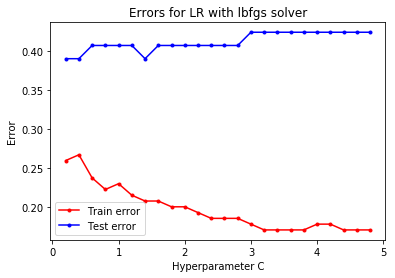

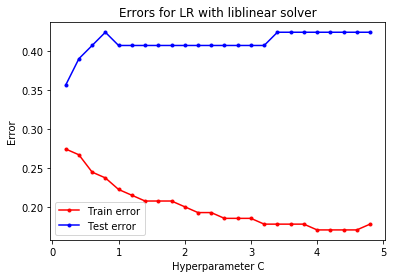

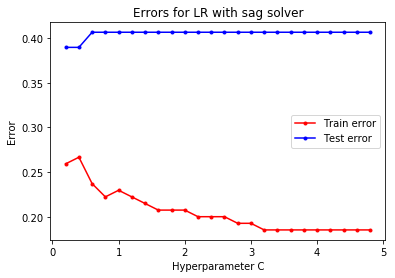

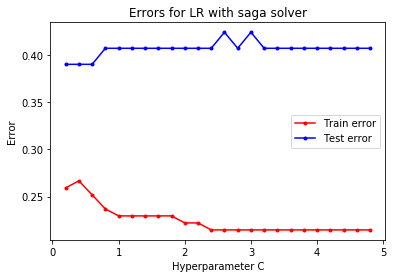

In [109]:
for i in range(len(train_error)):
    plt.plot(hyperC, train_error[i], '.-r', label = 'Train error')
    plt.plot(hyperC, test_error[i], '.-b', label = 'Test error')
    plt.legend()
    plt.title('Errors for LR with '+solvers[i]+ ' solver')
    plt.xlabel('Hyperparameter C')
    plt.ylabel('Error')
    plt.show()

<h3>Как видим везде ошибка на тестовой выборке значительно превышает ошибку на обучающей выборке</h3>

In [113]:
gridLR = GridSearchCV(lr, param_grid = {'C':np.arange(0.2, 5, 0.2), 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}, cv=10)
gridLR.fit(X, y.astype('int'))

best_cv_err = 1 - gridLR.best_score_
best_C = gridLR.best_estimator_.C
best_solver = gridLR.best_estimator_.solver
print(best_cv_err, best_C,best_solver)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not

C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\An

C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\An

C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\An

C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\An

C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\An

C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\An

C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\An

C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\An

C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\An

C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\An

0.412371134021 1.8 newton-cg


C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [114]:
gridLR.grid_scores_
lines = [[],[],[],[],[]]
for x in gridLR.grid_scores_:
    if x[0]['solver'] == 'newton-cg':
        lines[0].append((x[0]['C'],x[1]))
    if x[0]['solver'] == 'liblinear':
        lines[1].append((x[0]['C'],x[1]))
    if x[0]['solver'] == 'sag':
        lines[2].append((x[0]['C'],x[1]))
    if x[0]['solver'] == 'lbfgs':
        lines[3].append((x[0]['C'],x[1]))
    if x[0]['solver'] == 'saga':
        lines[4].append((x[0]['C'],x[1]))

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


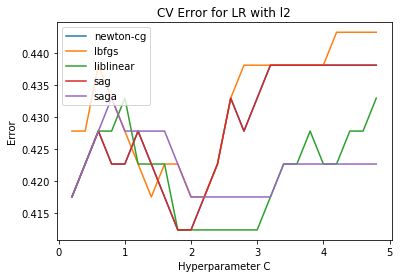

In [115]:
for i in range(len(lines)):
    plt.plot([x[0] for x in lines[i]],[1 - x[1] for x in lines[i]], label = solvers[i])
plt.legend()    
plt.title('CV Error for LR with l2')
plt.xlabel('Hyperparameter C')
plt.ylabel('Error')

<h1>LDA</h1>

In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ld = LinearDiscriminantAnalysis()
ld.fit(X_train, y_train.astype('int'))

err_train = np.mean(y_train.astype('int') != ld.predict(X_train))
err_test  = np.mean(y_test.astype('int')  != ld.predict(X_test))

print(err_train, err_test)

0.244444444444 0.508474576271


C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [119]:
n_components = range(1,X.shape[1])
train_error = [[],[]]
test_error = [[],[]]
solvers = ['svd', 'lsqr']
for n in n_components:
    for sol in solvers:
        ld = LinearDiscriminantAnalysis(n_components = n, solver = sol)
        ld.fit(X_train, y_train.astype('int'))
        err_train = np.mean(y_train.astype('int') != ld.predict(X_train))
        err_test = np.mean(y_test.astype('int') != ld.predict(X_test))
        if sol == 'svd':
            train_error[0].append(err_train)
            test_error[0].append(err_test)
        if sol == 'lsqr':
            train_error[1].append(err_train)
            test_error[1].append(err_test)

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


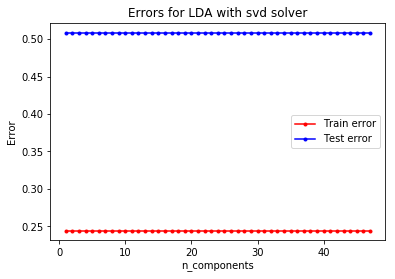

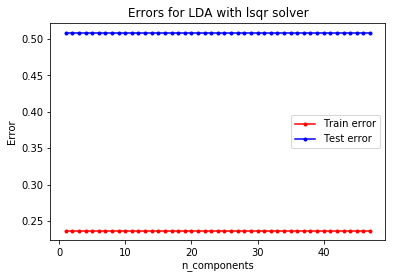

In [122]:
for j in range(len(train_error)):
    plt.plot(n_components, train_error[j], '.-r', label = 'Train error')
    plt.plot(n_components, test_error[j], '.-b', label = 'Test error')
    plt.legend()
    plt.title('Errors for LDA with '+solvers[j]+ ' solver')
    plt.xlabel('n_components')
    plt.ylabel('Error')
    plt.show()

<h3>Как видим, на тестовой выборке ошибка 50%, что означает, что метод плохо справляется с классификацией</h3>

In [124]:
gridLDA = GridSearchCV(ld, param_grid = {'n_components':range(1,X.shape[1]),'solver' : ['svd', 'lsqr']}, cv=10)
gridLDA.fit(X, y.astype('int'))

best_cv_err = 1 - gridLDA.best_score_
best_solver = gridLDA.best_estimator_.solver
best_n_components = gridLDA.best_estimator_.n_components
print(best_cv_err, best_solver, best_n_components)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables a

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are colli

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are colli

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are colli

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are colli

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are colli

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are colli

0.458762886598 svd 1


C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are colli

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


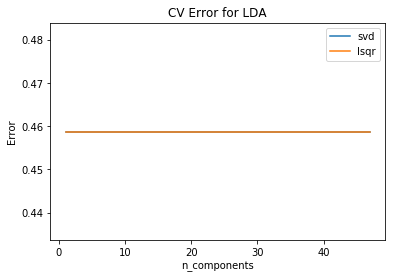

In [125]:
gridLDA.grid_scores_
lines = [[],[]]
solvers = ['svd', 'lsqr']
for x in gridLDA.grid_scores_:
    if x[0]['solver'] == 'svd':
        lines[0].append((x[0]['n_components'],x[1]))
    if x[0]['solver'] == 'lsqr':
        lines[1].append((x[0]['n_components'],x[1]))
#print(lines)

for i in range(len(lines)):
    plt.plot([x[0] for x in lines[i]],[1 - x[1] for x in lines[i]], label = solvers[i])
plt.legend()    
plt.title('CV Error for LDA')
plt.xlabel('n_components')
plt.ylabel('Error')

<h1>QDA</h1>

In [128]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qd = QuadraticDiscriminantAnalysis()
qd.fit(X_train, y_train.astype('int'))

err_train = np.mean(y_train.astype('int') != qd.predict(X_train))
err_test  = np.mean(y_test.astype('int')  != qd.predict(X_test))

print(err_train, err_test)

0.42962962963 0.372881355932


C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [133]:
reg_params = np.arange(0.1,5,0.2)
train_error = []
test_error = []
for reg in reg_params:
    qd = QuadraticDiscriminantAnalysis(reg_param = reg)
    qd.fit(X_train, y_train.astype('int'))
    err_train = np.mean(y_train.astype('int') != qd.predict(X_train))
    err_test = np.mean(y_test.astype('int') != qd.predict(X_test))
    train_error.append(err_train)
    test_error.append(err_test)

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:709: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


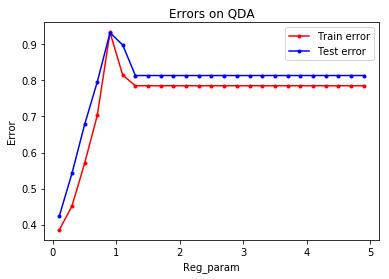

In [134]:
plt.plot(reg_params, train_error, '.-r', label = 'Train error')
plt.plot(reg_params, test_error,  '.-b', label = 'Test error')    
plt.legend()
plt.title('Errors on QDA')
plt.xlabel('Reg_param')
plt.ylabel('Error')
plt.show()

In [138]:
qd = QuadraticDiscriminantAnalysis()
gridQDA = GridSearchCV(qd, param_grid = {'reg_param':np.arange(0.1,5,0.2)}, cv=10)
gridQDA.fit(X, y.astype('int'))

best_cv_err = 1 - gridQDA.best_score_
best_reg_param = gridQDA.best_estimator_.reg_param

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collin

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:709: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:709: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda\lib\site-packages\skle

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:709: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:709: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda\lib\site-packages\skle

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:709: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:709: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda\lib\site-packages\skle

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:709: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:709: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Anaconda\lib\site-packages\skle

In [139]:
print(best_cv_err, best_reg_param)

0.443298969072 1.3


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


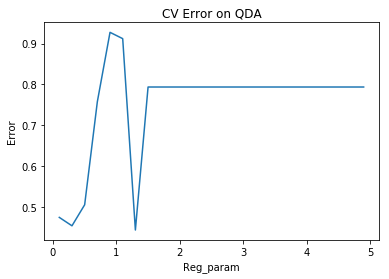

In [148]:
plt.plot(reg_params, [1-x[1] for x in gridQDA.grid_scores_])
plt.legend()    
plt.title('CV Error on QDA')
plt.xlabel('Reg_param')
plt.ylabel('Error')

<h1>Naive Bayes</h1>

In [146]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train.astype('int'))
y_train_predict = gnb.predict(X_train)
y_test_predict = gnb.predict(X_test)

err_train = np.mean(y_train.astype('int') != y_train_predict)
err_test  = np.mean(y_test.astype('int')  != y_test_predict)

print (err_train, err_test)

0.525925925926 0.576271186441


##### Как видим, Гауссовский байесовский классификатор имеет очень большую (57.6%) ошибку на тестовой выборке. Попробуем использовать Наивный Байес, имебщий распределение Бернулли

In [147]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train.astype('int'))
y_train_predict = bnb.predict(X_train)
y_test_predict = bnb.predict(X_test)

err_train = np.mean(y_train.astype('int') != y_train_predict)
err_test  = np.mean(y_test.astype('int')  != y_test_predict)
err_test_bb = err_test

print (err_train, err_test)

0.392592592593 0.35593220339


Получаем гораздо меньшую ошибку - 35%.

C:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


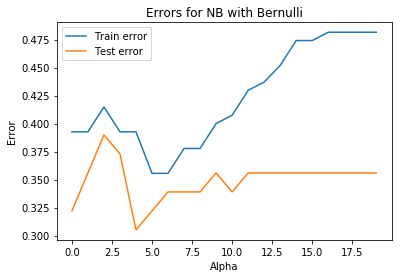

In [149]:
alpha = range(0,20)

train_error = []
test_error = []
for a in alpha:
    bnb = BernoulliNB(alpha = a)
    bnb.fit(X_train, y_train.astype('int'))
    train_error.append(np.mean(y_train.astype('int') != bnb.predict(X_train)))
    test_error.append(np.mean(y_test.astype('int') != bnb.predict(X_test)))
    
plt.plot(alpha, train_error, label = 'Train error')
plt.plot(alpha, test_error, label = 'Test error')
plt.legend()
plt.title('Errors for NB with Bernulli')
plt.xlabel('Alpha')
plt.ylabel('Error')

In [152]:
gridNB = GridSearchCV(bnb, param_grid = {'alpha':range(0,20)}, cv=10)
gridNB.fit(X, y.astype('int'))

best_cv_err = 1 - gridNB.best_score_
best_alpha = gridNB.best_estimator_.alpha

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Anacond

In [153]:
print(best_cv_err, best_alpha)

0.40206185567 9


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


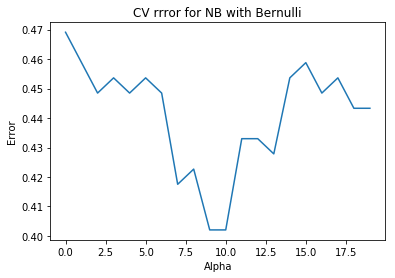

In [154]:
plt.plot(range(0,20), [1-x[1] for x in gridNB.grid_scores_])
plt.title('CV error for NB with Bernulli')
plt.xlabel('Alpha')
plt.ylabel('Error')

<h1>Random Forest</h1>

In [155]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train.astype('int'))

err_train = np.mean(y_train.astype('int') != rf.predict(X_train))
err_test  = np.mean(y_test.astype('int')  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.254237288136


К удивлению, Random Forest выдает значительно маленькую ошибку по сравнению с остальными алгоритмами - 25.4%. На тренировочной выборке ошибка равно 0, что возможно связано с переобучением

In [164]:
train_error = []
test_error = []
n_estimators = np.arange(1,20)
for n_trees in n_estimators:
    rf = ensemble.RandomForestClassifier(n_estimators=n_trees)
    rf.fit(X_train, y_train.astype('int'))
    train_error.append(np.mean(y_train.astype('int') != rf.predict(X_train)))
    test_error.append(np.mean(y_test.astype('int') != rf.predict(X_test)))

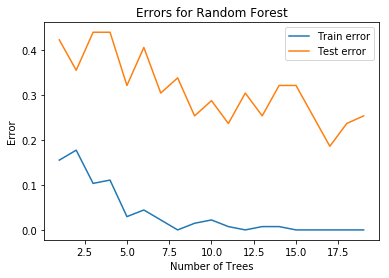

In [165]:
plt.plot(n_estimators, train_error, label = 'Train error')
plt.plot(n_estimators, test_error, label = 'Test error')
plt.legend()
plt.title('Errors for Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Error')

In [166]:
gridRF = GridSearchCV(rf, param_grid = {'n_estimators':range(1,20)}, cv=10)
gridRF.fit(X, y.astype('int'))

best_cv_err = 1 - gridRF.best_score_
best_trees = gridRF.best_estimator_.estimators_
print(best_cv_err, best_trees)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.273195876289 [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1501992142, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=2129335774, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_wei

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


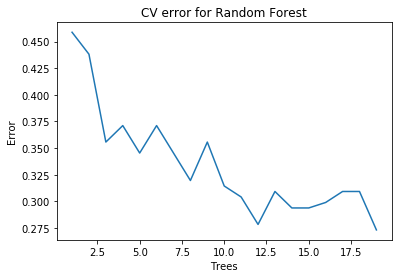

In [170]:
plt.plot(range(1,20), [1-x[1] for x in gridRF.grid_scores_])
plt.title('CV error for Random Forest')
plt.xlabel('Trees')
plt.ylabel('Error')

<h4>Вывод: всех лучше справился алгоритм Random Forest, который имеет CV ошибку 27%</h4>